In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import json

In [5]:
pred = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Baseline/LM_OneCellLineOneTreatment/MFM223_EGF_predictions.csv", index_col=0)
true = pd.read_csv("/dccstor/ipc1/CAR/DREAM/Model/Test/After_synthetic/MFM223/valid_data.csv", index_col=0).reset_index(drop=True)

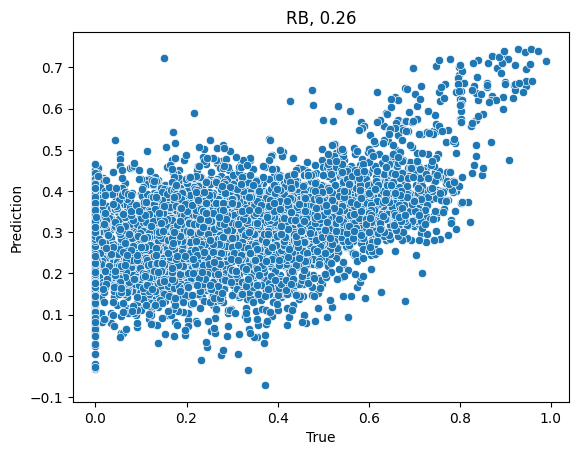

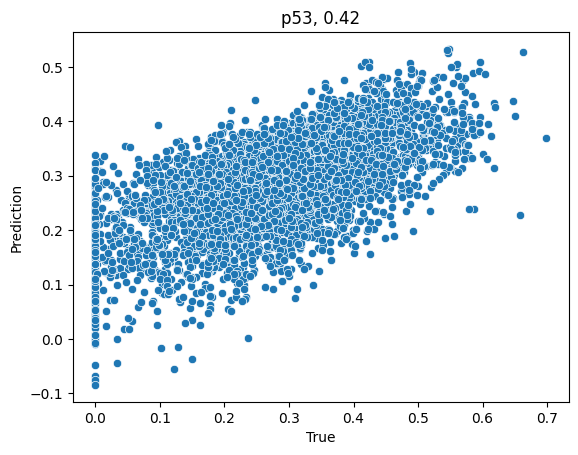

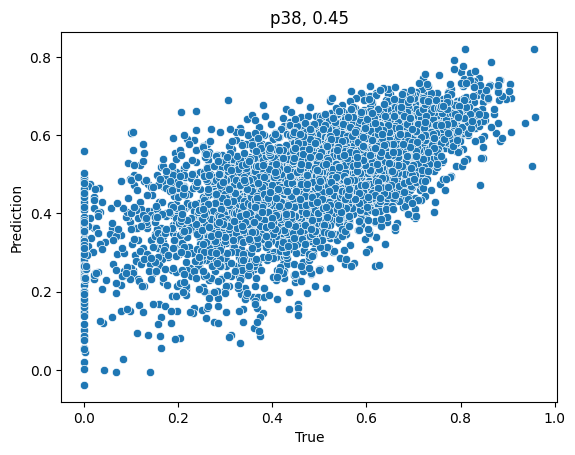

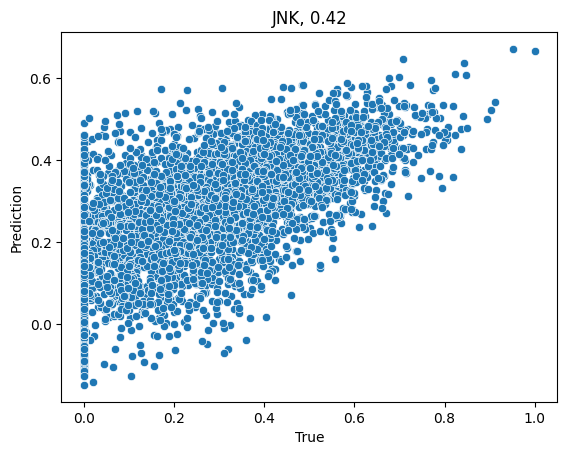

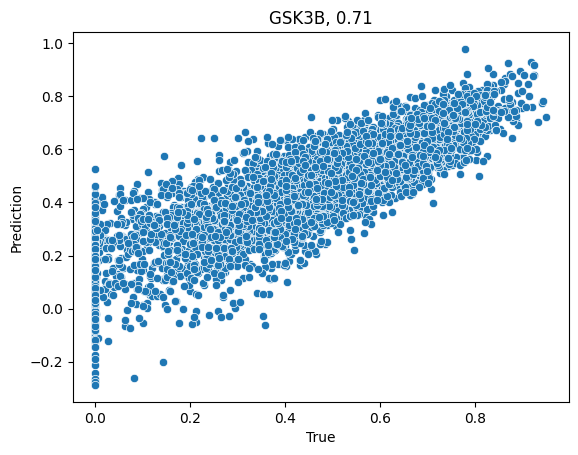

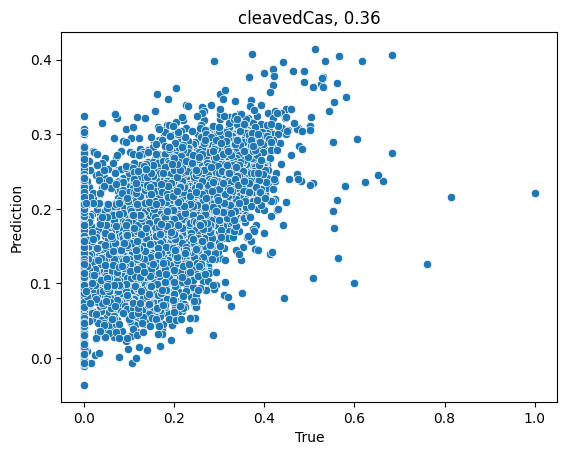

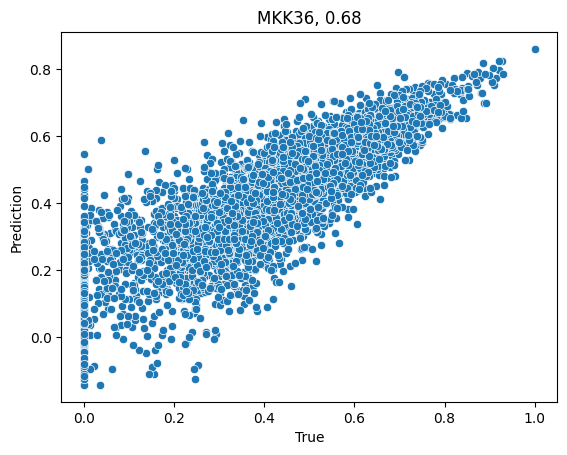

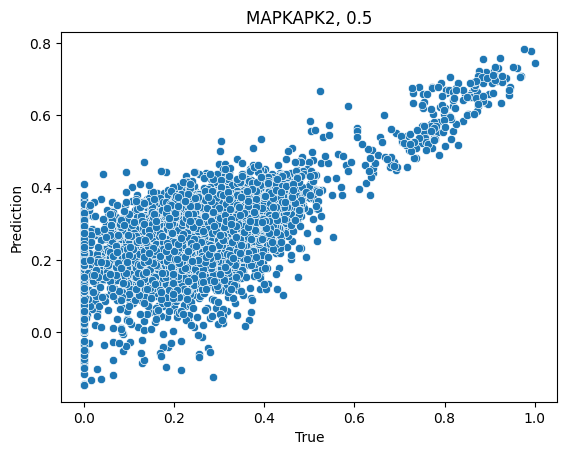

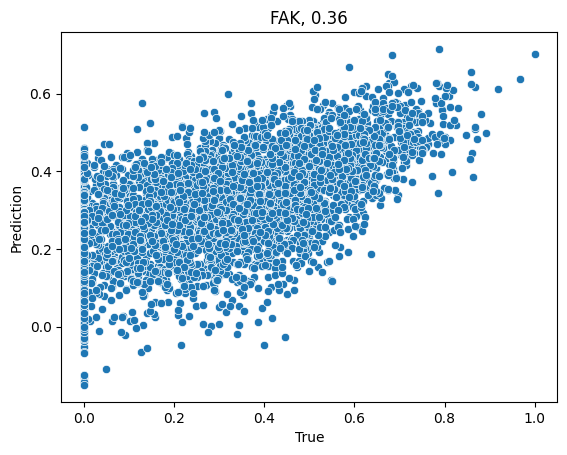

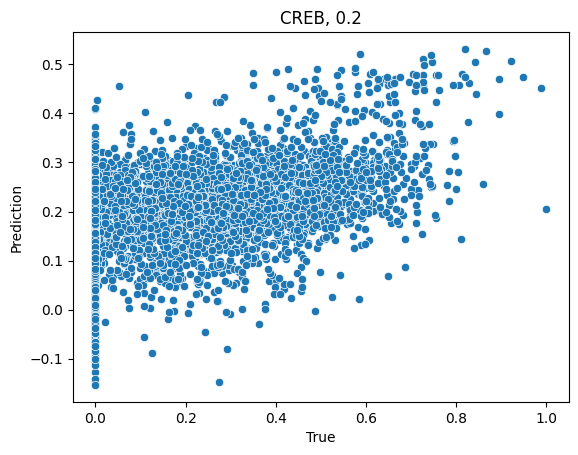

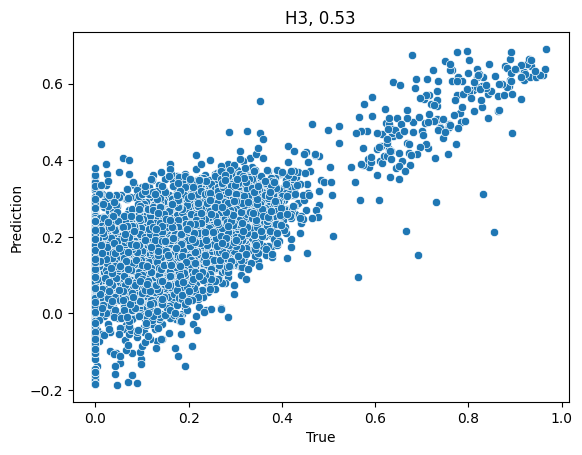

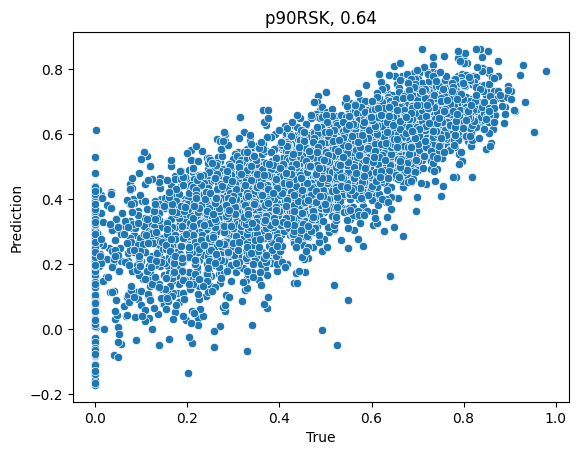

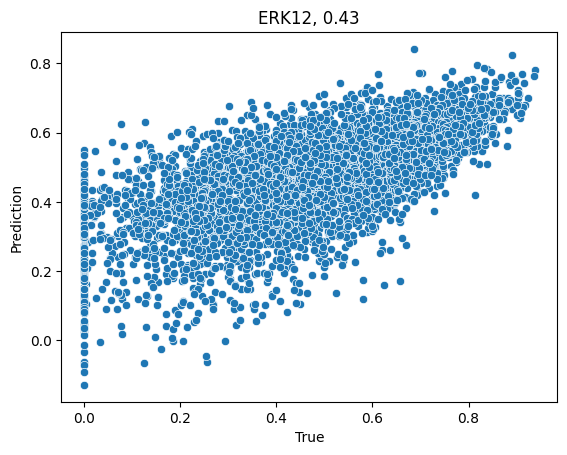

In [9]:
markers = set(pred.columns).intersection(set(true.columns))
# eval_markers = ["p.RB", "p.p53", "p.p38", "p.JNK", "p.GSK3b", "cleavedCas", "p.MKK3.MKK6", "p.MAPKAPK2", 
#                 "p.FAK", "p.CREB", "p.H3", "p.p90RSK", "p.ERK"]
eval_markers = [
    "RB",
    "p53",
    "p38",
    "JNK",
    "GSK3B",
    "cleavedCas",
    "MKK36",
    "MAPKAPK2",
    "FAK",
    "CREB",
    "H3",
    "p90RSK",
    "ERK12",
]
r2_scores = []
correlations = []
for marker in eval_markers:
    corr = true[marker].corr(pred[marker], method='pearson')
    correlations.append(corr)
    r2 = r2_score(true[marker], pred[marker])
    r2_scores.append(r2)
    sns.scatterplot(x=true[marker], y=pred[marker])
    plt.xlabel("True")
    plt.ylabel("Prediction")
    plt.title(f"{marker}, {round(r2, 2)}")
    plt.show()

In [10]:
pd.Series(r2_scores).mean()

0.45988760990513133

In [11]:
pd.Series(correlations).mean()

0.6693118613811185

In [12]:
pred.max()

RB            0.744810
p53           0.533290
p38           0.820489
JNK           0.672033
GSK3B         0.978625
cleavedCas    0.414306
MKK36         0.860730
MAPKAPK2      0.784091
FAK           0.715108
CREB          0.531216
H3            0.690866
p90RSK        0.863074
ERK12         0.841381
dtype: float64

In [13]:
pred.min()

RB           -0.070486
p53          -0.084582
p38          -0.038687
JNK          -0.147885
GSK3B        -0.287714
cleavedCas   -0.035966
MKK36        -0.143492
MAPKAPK2     -0.145864
FAK          -0.150286
CREB         -0.153258
H3           -0.186871
p90RSK       -0.171529
ERK12        -0.128221
dtype: float64